In [104]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [105]:
df = pd.read_csv("./dataset/energydata_complete.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [106]:
df.shape

(19735, 29)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

## Data Cleaning & Processing

In [108]:
# change column names
df = df.rename({
    "Appliances": "appliances",
    "T1": "temp_kitchen",
    "RH_1": "humid_kitchen",
    "T2": "temp_living",
    "RH_2": "humid_living",
    "T3": "temp_laundry",
    "RH_3": "humid_laundry",
    "T4": "temp_office",
    "RH_4": "humid_office",
    "T5": "temp_bathroom",
    "RH_5": "humid_bathroom",
    "T6": "temp_outside_north",
    "RH_6": "humid_outside_north",
    "T7": "temp_iron",
    "RH_7": "humid_iron",
    "T8": "temp_teenager",
    "RH_8": "humid_teenager",
    "T9": "temp_parents",
    "RH_9": "humid_parents",
    "T_out": "temp_outside",
    "RH_out": "humid_outside",
    "Windspeed": "wind_speed",
    "Press_mm_hg": "pressure",
    "Visibility": "visibility",
    "Tdewpoint": "tdewpoint"
}, axis=1)

df.head()

,date,appliances,lights,temp_kitchen,humid_kitchen,temp_living,humid_living,temp_laundry,humid_laundry,temp_office,...,temp_parents,humid_parents,temp_outside,pressure,humid_outside,wind_speed,visibility,tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [109]:
# convert date column to datetime object
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 19735 non-null  datetime64[ns]
 1   appliances           19735 non-null  int64         
 2   lights               19735 non-null  int64         
 3   temp_kitchen         19735 non-null  float64       
 4   humid_kitchen        19735 non-null  float64       
 5   temp_living          19735 non-null  float64       
 6   humid_living         19735 non-null  float64       
 7   temp_laundry         19735 non-null  float64       
 8   humid_laundry        19735 non-null  float64       
 9   temp_office          19735 non-null  float64       
 10  humid_office         19735 non-null  float64       
 11  temp_bathroom        19735 non-null  float64       
 12  humid_bathroom       19735 non-null  float64       
 13  temp_outside_north   19735 non-

In [110]:
df.describe()

,appliances,lights,temp_kitchen,humid_kitchen,temp_living,humid_living,temp_laundry,humid_laundry,temp_office,humid_office,...,temp_parents,humid_parents,temp_outside,pressure,humid_outside,wind_speed,visibility,tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


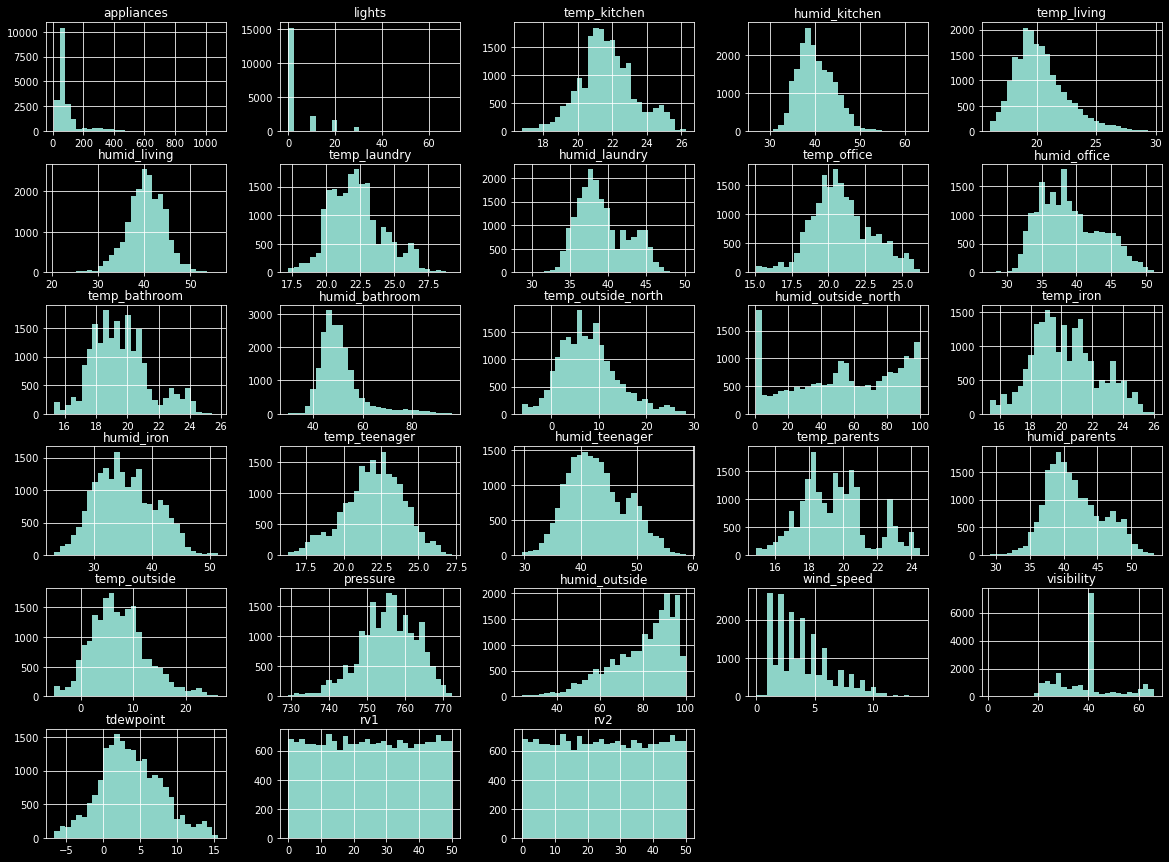

In [111]:
# see the distribution of each feature
df.drop('date', axis='columns').hist(bins=30, figsize=(20,15));

<AxesSubplot:>

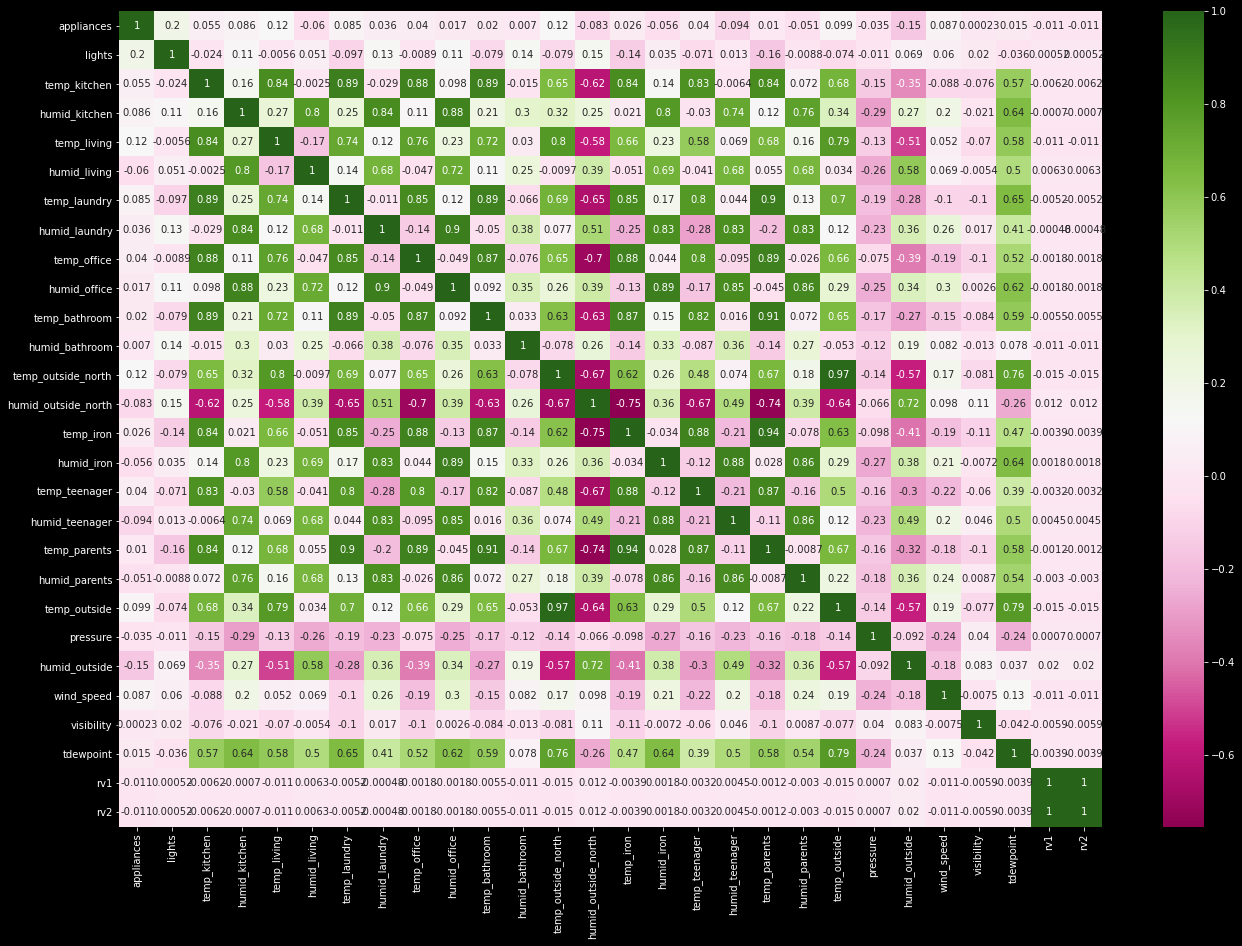

In [112]:
# Heatmap to see correlation
plt.figure(figsize=(22,15))
sns.heatmap(df.corr(), annot=True, cmap="PiYG")

In [113]:
df = df.set_index("date")
df.head()

,appliances,lights,temp_kitchen,humid_kitchen,temp_living,humid_living,temp_laundry,humid_laundry,temp_office,humid_office,...,temp_parents,humid_parents,temp_outside,pressure,humid_outside,wind_speed,visibility,tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [114]:
sorted_appliances = df.sort_values('appliances',ascending=False)
sorted_appliances.head()

,appliances,lights,temp_kitchen,humid_kitchen,temp_living,humid_living,temp_laundry,humid_laundry,temp_office,humid_office,...,temp_parents,humid_parents,temp_outside,pressure,humid_outside,wind_speed,visibility,tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-16 18:50:00,1080,30,21.930000,42.766667,21.040000,38.080000,20.700000,40.633333,20.89,39.733333,...,17.79,40.672500,2.083333,765.033333,85.500000,3.666667,40.000000,-0.083333,27.408521,27.408521
2016-01-21 18:50:00,1070,30,19.600000,34.300000,18.426667,33.963333,18.390000,36.930000,17.70,35.400000,...,16.00,36.930000,-0.616667,764.533333,82.833333,1.000000,64.166667,-3.216667,11.735734,11.735734
2016-01-14 17:00:00,910,0,21.463333,41.693333,20.856667,38.363333,21.666667,43.930000,18.70,42.660000,...,17.00,43.466667,4.600000,747.900000,76.000000,7.000000,40.000000,0.700000,18.937972,18.937972
2016-04-04 15:40:00,900,0,23.000000,43.166667,22.200000,40.426667,26.100000,38.930000,21.60,41.526667,...,20.70,43.333333,14.766667,749.266667,59.666667,7.000000,40.000000,7.000000,15.105153,15.105153
2016-01-21 19:00:00,890,20,19.730000,37.863333,18.566667,34.090000,18.390000,36.863333,17.60,35.133333,...,16.00,36.730000,-0.800000,764.500000,84.000000,1.000000,64.000000,-3.200000,3.221583,3.221583


The number of the 0.1% top values of appliances load is 19
and they have power load higer than 790 Wh


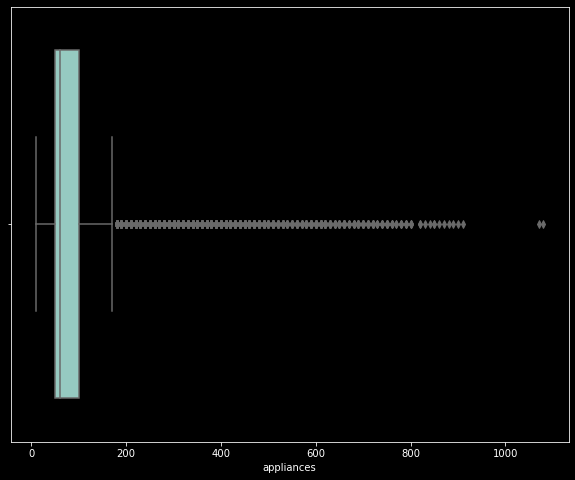

In [115]:
# Consider only 0.1% as outliers
threshold = int(np.floor(len(sorted_appliances) * 0.001))
print(f"The number of the 0.1% top values of appliances load is {threshold}")
print(f"and they have power load higer than {sorted_appliances['appliances'][threshold]} Wh")
plt.figure(figsize=(10,8))
sns.boxplot(sorted_appliances['appliances']);

In [116]:
# exclude instances with appliance equal 790 or above Wh
df = df[(df['appliances'] <= 790) & (df['appliances'] > 0)]
df.shape

(19718, 28)

In [117]:
# Create more columns
df['hour'] = df.index.hour
df['week'] = df.index.week
df['weekday'] = df.index.weekday
df['month'] = df.index.month
df.head()

,appliances,lights,temp_kitchen,humid_kitchen,temp_living,humid_living,temp_laundry,humid_laundry,temp_office,humid_office,...,humid_outside,wind_speed,visibility,tdewpoint,rv1,rv2,hour,week,weekday,month
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,17,2,0,1
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,17,2,0,1
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,92.0,6.333333,55.333333,5.1,28.642668,28.642668,17,2,0,1
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,92.0,6.000000,51.500000,5.0,45.410389,45.410389,17,2,0,1
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,92.0,5.666667,47.666667,4.9,10.084097,10.084097,17,2,0,1


In [118]:
# scale appliances
df['log_appliances'] = np.log(df['appliances'])
# average house temperature
df['house_temp'] = (df['temp_kitchen'] + df['temp_living'] + df['temp_laundry'] + df['temp_office'] + df['temp_bathroom'] +
                    df['temp_iron'] + df['temp_teenager'] + df['temp_parents'])
# average house humidity
df['house_humid'] = (df['humid_kitchen'] + df['humid_living'] + df['humid_laundry'] + df['humid_office'] + df['humid_bathroom'] +
                    df['humid_iron'] + df['humid_teenager'] + df['humid_parents'])

df.head()

,appliances,lights,temp_kitchen,humid_kitchen,temp_living,humid_living,temp_laundry,humid_laundry,temp_office,humid_office,...,tdewpoint,rv1,rv2,hour,week,weekday,month,log_appliances,house_temp,house_humid
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,5.3,13.275433,13.275433,17,2,0,1,4.094345,147.480000,373.940000
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,5.2,18.606195,18.606195,17,2,0,1,4.094345,147.513333,373.381667
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,5.1,28.642668,28.642668,17,2,0,1,3.912023,147.373333,372.503333
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,5.0,45.410389,45.410389,17,2,0,1,3.912023,147.170000,371.750000
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,4.9,10.084097,10.084097,17,2,0,1,4.094345,147.270000,371.703333


In [119]:
df.columns

Index(['appliances', 'lights', 'temp_kitchen', 'humid_kitchen', 'temp_living',
       'humid_living', 'temp_laundry', 'humid_laundry', 'temp_office',
       'humid_office', 'temp_bathroom', 'humid_bathroom', 'temp_outside_north',
       'humid_outside_north', 'temp_iron', 'humid_iron', 'temp_teenager',
       'humid_teenager', 'temp_parents', 'humid_parents', 'temp_outside',
       'pressure', 'humid_outside', 'wind_speed', 'visibility', 'tdewpoint',
       'rv1', 'rv2', 'hour', 'week', 'weekday', 'month', 'log_appliances',
       'house_temp', 'house_humid'],
      dtype='object')

In [120]:
# Remove additive assumptions
df['hour*lights'] = df['hour'] * df['lights']
df['temp_humid_kitchen'] = df['temp_kitchen'] * df['humid_kitchen']
df['temp_humid_living'] = df['temp_living'] * df['humid_living']
df['temp_humid_laundry'] = df['temp_laundry'] * df['humid_laundry']
df['temp_humid_office'] = df['temp_office'] * df['humid_office']
df['temp_humid_bathroom'] = df['temp_bathroom'] * df['humid_bathroom']
df['temp_humid_outside_north'] = df['temp_outside_north'] * df['humid_outside_north']
df['temp_humid_iron'] = df['temp_iron'] * df['humid_iron']
df['temp_humid_teenager'] = df['temp_teenager'] * df['humid_teenager']
df['temp_humid_parents'] = df['temp_parents'] * df['humid_parents']

df.head()

,appliances,lights,temp_kitchen,humid_kitchen,temp_living,humid_living,temp_laundry,humid_laundry,temp_office,humid_office,...,hour*lights,temp_humid_kitchen,temp_humid_living,temp_humid_laundry,temp_humid_office,temp_humid_bathroom,temp_humid_outside_north,temp_humid_iron,temp_humid_teenager,temp_humid_parents
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,510,946.6977,859.968,885.206700,865.766667,947.600000,592.043511,715.978667,889.980000,775.527667
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,510,928.7304,858.672,886.394100,873.857500,947.600000,574.432778,714.832000,889.312667,777.557333
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,510,920.9070,856.832,889.230667,868.544733,945.711667,545.507733,712.653333,886.886000,773.500000
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,680,916.2660,856.128,890.550000,863.713767,945.711667,536.690111,707.435333,879.479000,771.800000
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,680,921.5700,854.976,890.550000,860.061700,947.548000,540.487556,709.156000,879.479000,771.800000


In [121]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].agg('mean'))

In [125]:
df['weekday_avg'] = list(map(code_mean(df, 'weekday', 'appliances').get, df.weekday))
df['hour_avg'] = list(map(code_mean(df, 'hour', 'appliances').get, df.hour))
df.head(7)

,appliances,lights,temp_kitchen,humid_kitchen,temp_living,humid_living,temp_laundry,humid_laundry,temp_office,humid_office,...,temp_humid_living,temp_humid_laundry,temp_humid_office,temp_humid_bathroom,temp_humid_outside_north,temp_humid_iron,temp_humid_teenager,temp_humid_parents,weekday_avg,hour_avg
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,859.968,885.206700,865.766667,947.600000,592.043511,715.978667,889.980000,775.527667,110.896974,158.812121
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,858.672,886.394100,873.857500,947.600000,574.432778,714.832000,889.312667,777.557333,110.896974,158.812121
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,856.832,889.230667,868.544733,945.711667,545.507733,712.653333,886.886000,773.500000,110.896974,158.812121
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,856.128,890.550000,863.713767,945.711667,536.690111,707.435333,879.479000,771.800000,110.896974,158.812121
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,854.976,890.550000,860.061700,947.548000,540.487556,709.156000,879.479000,771.800000,110.896974,158.812121
2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,45.730000,...,854.400,889.230667,863.839700,942.847333,540.330000,706.921333,879.479000,769.930000,110.896974,158.812121
2016-01-11 18:00:00,60,50,19.89,45.766667,19.2,44.500000,19.79,44.900000,18.890000,45.790000,...,854.400,888.571000,864.973100,939.930000,539.210367,705.893333,879.479000,769.930000,110.896974,187.426829


In [129]:
# Resample the data 
df_hour = df.resample('1H').mean()
df_30mn = df.resample('30min').mean()
df_30mn.head()

,appliances,lights,temp_kitchen,humid_kitchen,temp_living,humid_living,temp_laundry,humid_laundry,temp_office,humid_office,...,temp_humid_living,temp_humid_laundry,temp_humid_office,temp_humid_bathroom,temp_humid_outside_north,temp_humid_iron,temp_humid_teenager,temp_humid_parents,weekday_avg,hour_avg
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,56.666667,30.000000,19.890000,46.863333,19.200000,44.713056,19.790000,44.817778,18.975556,45.816389,...,858.490667,886.943822,869.389633,946.970556,570.661341,714.488000,888.726222,775.528333,110.896974,158.812121
2016-01-11 17:30:00,53.333333,40.000000,19.890000,46.142222,19.200000,44.540000,19.790000,44.977778,18.890000,45.661111,...,855.168000,890.110222,862.538389,945.369000,539.169222,707.837556,879.479000,771.176667,110.896974,158.812121
2016-01-11 18:00:00,60.000000,46.666667,19.845556,45.641389,19.200000,44.477778,19.750000,44.863333,18.890000,45.814444,...,853.973333,886.051567,865.434856,940.962222,536.096252,707.037778,879.479000,769.930000,110.896974,187.426829
2016-01-11 18:30:00,293.333333,56.666667,19.950000,46.116667,19.337778,44.400000,19.790000,44.863333,18.926667,46.318889,...,858.597333,887.845367,876.666244,940.500000,541.705415,742.168772,879.200074,768.269367,110.896974,187.426829
2016-01-11 19:00:00,260.000000,33.333333,20.273333,52.206667,19.717778,45.111111,19.937778,45.973333,19.000000,47.427778,...,889.560074,916.680319,901.127778,944.794000,532.611649,819.320252,881.779630,766.571272,110.896974,141.256098


In [132]:
# Assume that low consumption implies low energy load, and hight consumption implies high energy load
df_hour['low_consum'] = (df_hour['appliances'] + 25 < (df_hour['hour_avg'])) * 1
df_hour['high_consum'] = (df_hour['appliances'] + 25 > (df_hour['hour_avg'])) * 1

df_30mn['low_consum'] = (df_30mn['appliances'] + 25 < (df_30mn['hour_avg'])) * 1
df_30mn['high_consum'] = (df_30mn['appliances'] + 35 > (df_30mn['hour_avg'])) * 1

df_hour.head()

,appliances,lights,temp_kitchen,humid_kitchen,temp_living,humid_living,temp_laundry,humid_laundry,temp_office,humid_office,...,temp_humid_office,temp_humid_bathroom,temp_humid_outside_north,temp_humid_iron,temp_humid_teenager,temp_humid_parents,weekday_avg,hour_avg,low_consum,high_consum
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,55.000000,35.000000,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,...,865.964011,946.169778,554.915281,711.162778,884.102611,773.352500,110.896974,158.812121,1,0
2016-01-11 18:00:00,176.666667,51.666667,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,...,871.050550,940.731111,538.900833,724.603275,879.339537,769.099683,110.896974,187.426829,0,1
2016-01-11 19:00:00,173.333333,25.000000,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,...,907.027646,957.418201,516.283758,803.639470,893.576233,765.862903,110.896974,141.256098,0,1
2016-01-11 20:00:00,125.000000,35.000000,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,...,944.715828,1305.601119,475.450769,756.810111,942.331767,762.058033,110.896974,126.982968,0,1
2016-01-11 21:00:00,103.333333,23.333333,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,...,930.867622,1269.097126,480.490483,779.185664,948.882974,756.803367,110.896974,96.496350,0,1


In [193]:
def plot_appliances(df, period):
    appliances = df.groupby(period).agg('mean')['appliances']
    appliances.plot(figsize=(10,8))
    plt.title(f'Average Energy Consumption per {period.capitalize()}')
    plt.grid(b=True)
    if period == 'hour':
        plt.xlabel("Hour")
        plt.xticks(ticks=np.arange(24))
    if period == 'weekday':
        plt.xlabel(None)
        plt.xticks(np.arange(7),['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    if period == 'month':
        plt.xticks(np.arange(1,6), ['Jan', 'Feb', 'Mar', 'Apr', 'May'])
    plt.ylabel("Energy use in Wh")
    plt.show()


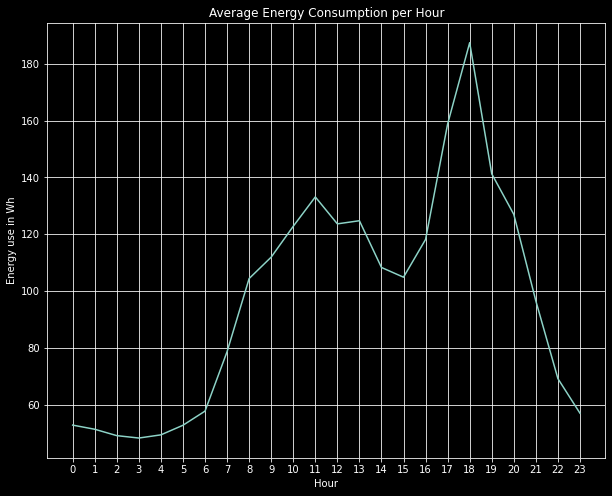

In [194]:
plot_appliances(df, 'hour')

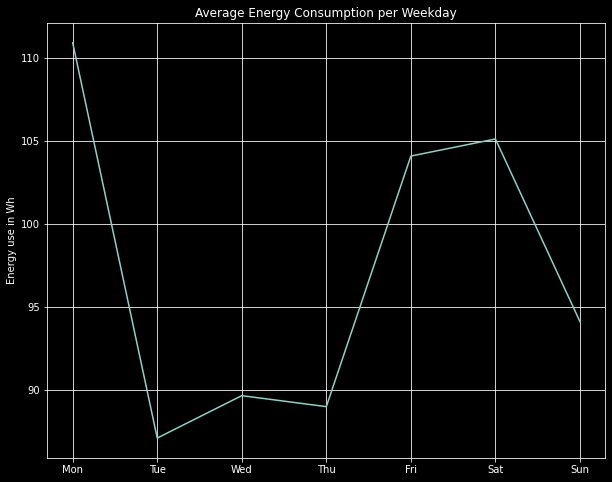

In [195]:
plot_appliances(df, 'weekday')

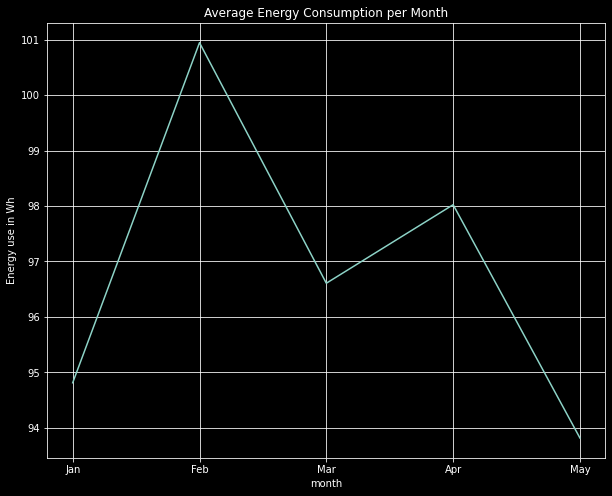

In [196]:
plot_appliances(df, 'month')

In [202]:
def monthly_daily(df, x):
    by_day = df.pivot_table(
        index='month',
        columns=['weekday'],
        values=x,
        aggfunc='mean'
    )
    return round(by_day, ndigits=2)

<AxesSubplot:title={'center':'Mean Appliance Consumption (Wh) per weekday/month'}, xlabel='weekday', ylabel='month'>

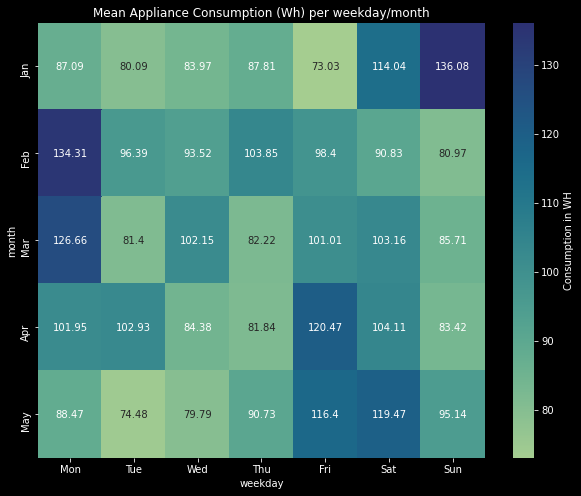

In [210]:
plt.figure(figsize=(10,8))
plt.title("Mean Appliance Consumption (Wh) per weekday/month")
sns.heatmap(monthly_daily(df, 'appliances'), 
            annot=True, cmap='crest',
            xticklabels= 'Mon Tue Wed Thu Fri Sat Sun'.split(" "),
            yticklabels= 'Jan Feb Mar Apr May'.split(" "),
            fmt='g',
            cbar_kws={'label': 'Consumption in WH'}
        )
plt.show()